# Stock Market Prediction of MRF Tyre using LSTM
**CODECLAUSE PVT LTD**

**Task 01 - Stock Market Prediction of MRF Limited**

**Akash Kokne - Data Science Intern**


In this Project, I have implement MRF Tyre Stock Price Prediction with a Machine Learning technique. We will use TensorFlow, an Open-Source Python Machine Learning Framework developed by Google. TensorFlow makes it easy to implement Time Series forecasting data. Since Stock Price Prediction is one of the Time Series Forecasting problems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset
The dataset we will use here to perform the analysis and build a predictive model is MRF Limited Stock Price data. We will use OHLC (‘Open’, ‘High’, ‘Low’, ‘Close’) data from 30st August 2018 to 30st August 2023 which is for 5 years for the MRF Limited stocks.

You can download the CSV file from: https://finance.yahoo.com/quote/MRF.NS/history?p=MRF.NS

In [2]:
df = pd.read_csv("MRF.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-30,73753.898438,74153.953125,73001.0,73218.796875,72702.710938,5919
1,2018-08-31,73250.000000,74300.000000,73000.0,74026.750000,73504.976563,4913
2,2018-09-03,73777.000000,74169.953125,73000.0,73038.898438,72524.093750,3917
3,2018-09-04,73300.000000,73600.000000,70850.0,71028.898438,70528.265625,8961
4,2018-09-05,71299.000000,71299.000000,70001.0,70352.296875,69856.421875,7748


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-08-23,108410.000000,109200.000000,108051.148438,108675.546875,108675.546875,4181
1230,2023-08-24,109399.000000,109399.000000,108106.000000,108595.148438,108595.148438,4788
1231,2023-08-25,108127.648438,108895.703125,108000.546875,108542.000000,108542.000000,3562
1232,2023-08-28,108523.703125,108900.546875,107921.546875,108288.000000,108288.000000,3583
1233,2023-08-29,108353.703125,109000.000000,108250.851563,108812.500000,108812.500000,2244


In [4]:
df.shape

(1234, 7)

From this, we got to know that there are 1234 rows of data available and for each row, we have 7 different features or columns.

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1234 non-null   float64
 2   High       1234 non-null   float64
 3   Low        1234 non-null   float64
 4   Close      1234 non-null   float64
 5   Adj Close  1234 non-null   float64
 6   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


Whenever we deal with the date or time feature, it should always be in the DateTime data type. Pandas library helps us convert the object date feature to the DateTime data type.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1234 non-null   datetime64[ns]
 1   Open       1234 non-null   float64       
 2   High       1234 non-null   float64       
 3   Low        1234 non-null   float64       
 4   Close      1234 non-null   float64       
 5   Adj Close  1234 non-null   float64       
 6   Volume     1234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.6 KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,73658.702014,74449.152616,72786.121062,73562.903379,73263.411755,13127.777958
std,13181.816497,13264.467305,13094.724412,13186.136554,13260.256190,15837.347341
min,50155.550781,53400.000000,49915.101563,51970.250000,51665.777344,0.000000
25%,62966.750000,63811.000000,62135.524414,62961.423828,62582.227539,5762.500000
50%,71534.000000,72368.324219,70553.851562,71329.601562,71023.191407,8690.000000
75%,83181.500000,83968.750000,82232.400391,83086.974610,82822.535156,14416.000000
max,111472.000000,111997.000000,108250.851563,111296.500000,111296.500000,281075.000000


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [8]:
df[df['Close'] == df['Adj Close']].shape

(28, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [9]:
df = df.drop(['Adj Close'], axis=1)

Let’s check for the null values if any are present in the data frame.

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

Now let’s draw the distribution plot for the continuous features given in the dataset.

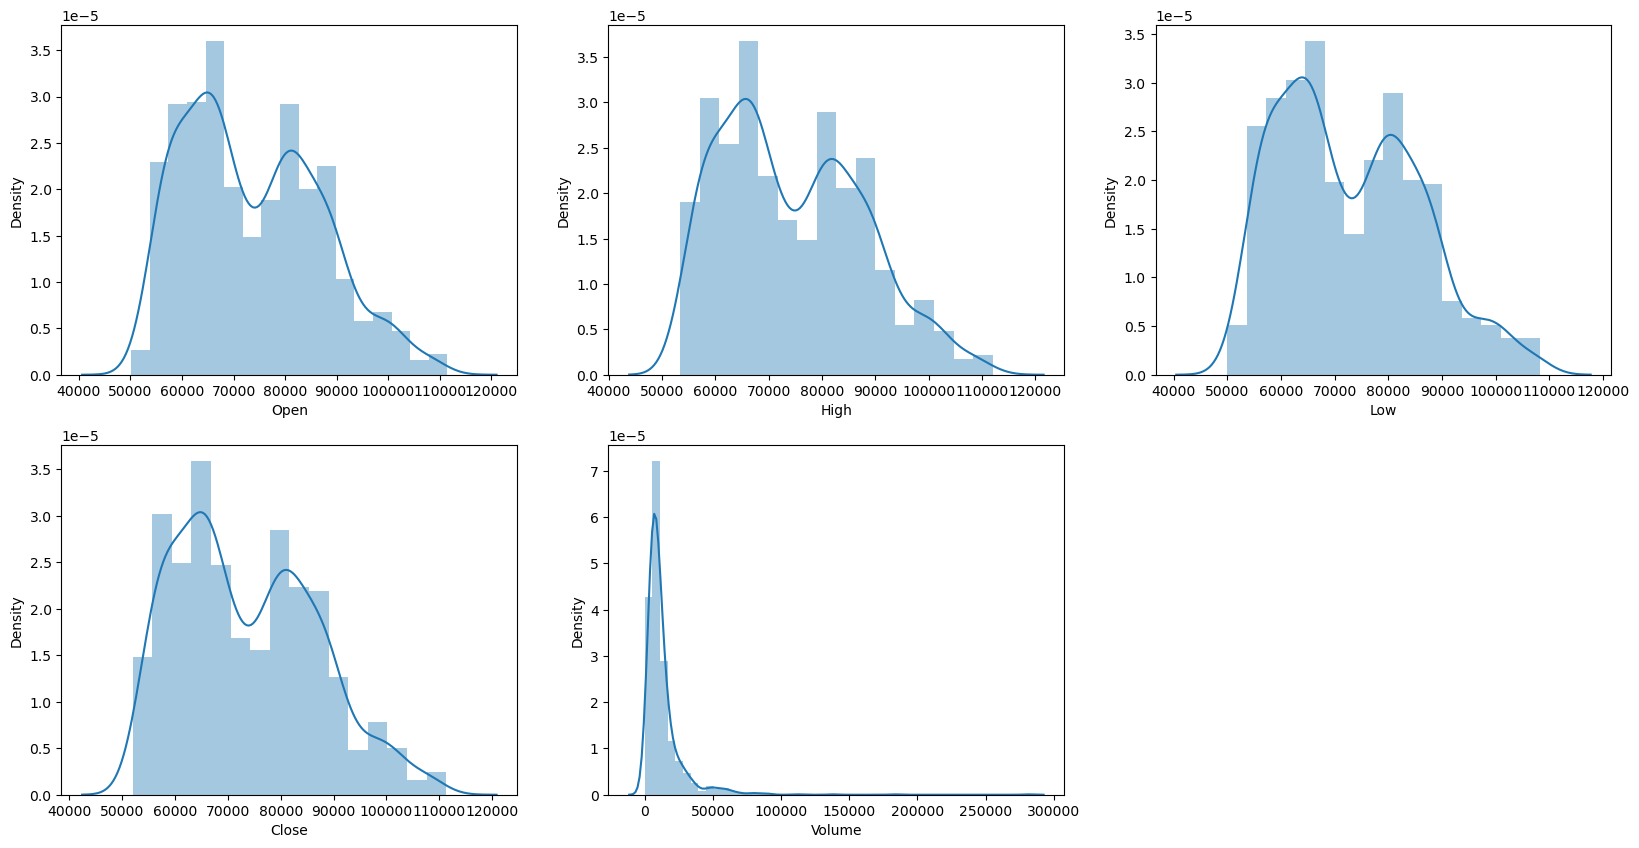

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions and the Volume data is right-skewed.

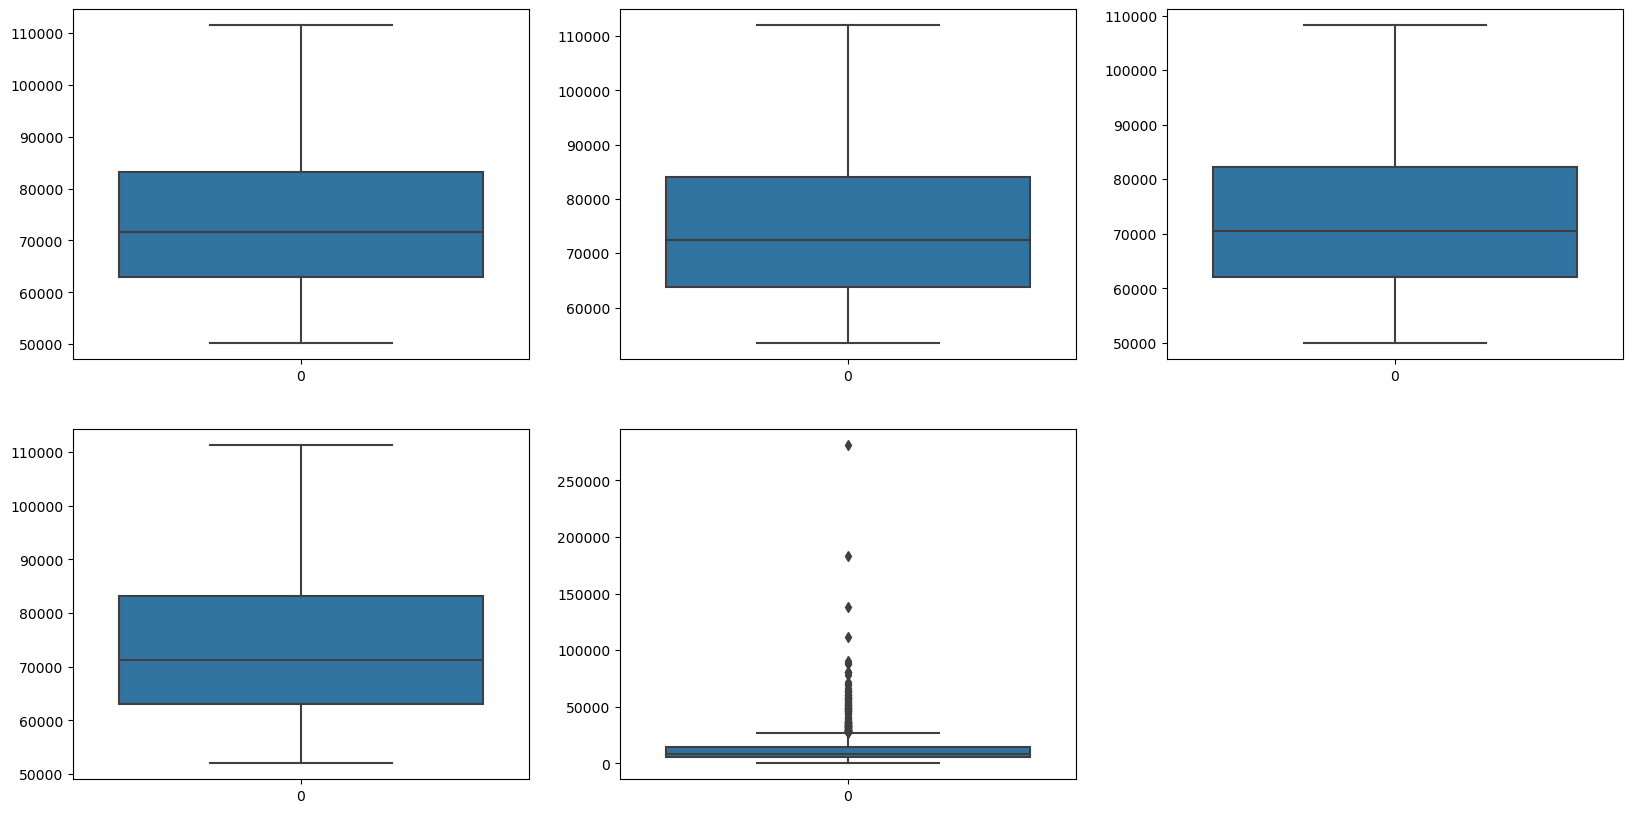

In [12]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

While performing the EDA of the MRF Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

Now, let’s just plot the Close prices of MRF Tyre Stock for the time period of 2013 to 2018 which is for a span of 5 years.

Text(0.5, 1.0, 'MRF Stock Prices')

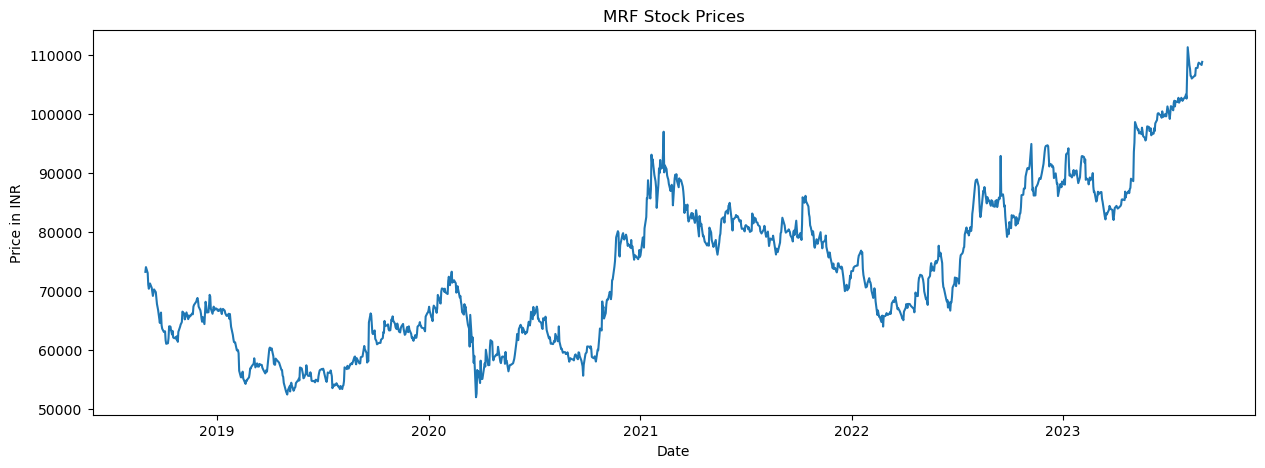

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
prediction = df.loc[(df['Date'] > datetime(2018, 8, 30)) & (df['Date'] < datetime(2023, 8, 30))]
  
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Close'])
plt.xlabel("Date")
plt.ylabel("Price in INR")
plt.title("MRF Stock Prices")

Trends in the Close price of trade of MRF Stock over the years.

The prices of MRF stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

Now let’s analyze the data for MRF Stocks from 2013 to 2018.

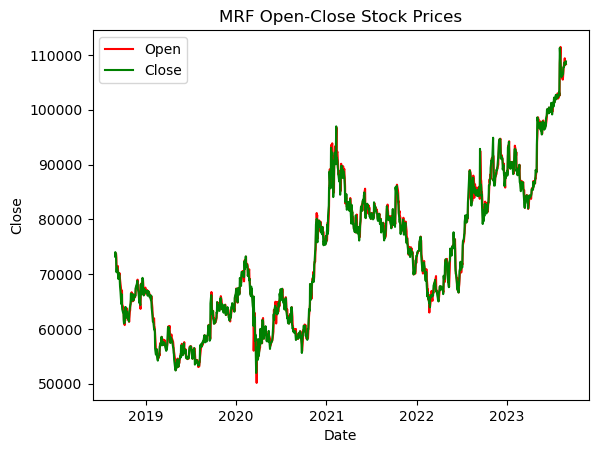

In [14]:
plt.plot(df['Date'],df['Open'],color="red",label="Open")
plt.plot(df['Date'],df['Close'],color="green",label="Close")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("MRF Open-Close Stock Prices")
plt.legend()

Trends in the prices of MRF Tyre Stock over the years.

#### Trends in the volumes of trade of MRF Stock over the years

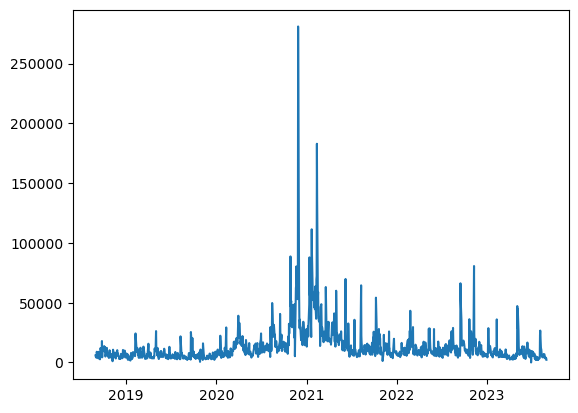

In [15]:
plt.plot(df['Date'], df['Volume'])
plt.show()

### Heatmap too analyzes the correlation between different features

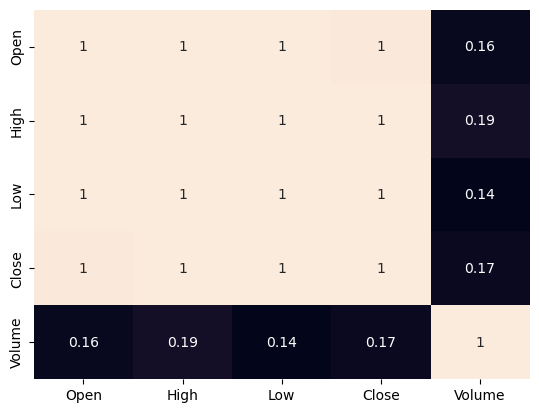

In [16]:
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

Now let’s select a subset of the whole data as the training data so, that we will be left with a subset of the data for the validation part as well.

In [17]:
close_data = df.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1173


Now we have the training data length, next applying scaling and preparing features and labels that are x_train and y_train. 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training), :]

In [19]:
# prepare feature and labels
x_train = []
y_train = []
 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Build Gated RNN- LSTM network using TensorFlow
Using TensorFlow, we can easily create LSTM-gated RNN cells. LSTM is used in Recurrent Neural Networks for sequence models and time series data. LSTM is used to avoid the vanishing gradient issue which is widely occurred in training RNN. To stack multiple LSTM in TensorFlow it is mandatory to use return_sequences = True. Since our data is time series varying we apply no activation to the output layer and it remains as 1 node. 

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000022EB919AB50>>

## Model Compilation and Training
While compiling a model we provide these three essential parameters:

optimizer – This is the method that helps to optimize the cost function by using gradient descent.

loss – The loss function by which we monitor whether the model is improving with training or not.

metrics – This helps to evaluate the model by predicting the training and the validation data.

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 34s 166ms/step - loss: 0.0234
Epoch 2/10
35/35 [==============================] - 6s 175ms/step - loss: 0.0102
Epoch 3/10
35/35 [==============================] - 5s 131ms/step - loss: 0.0084
Epoch 4/10
35/35 [==============================] - 4s 121ms/step - loss: 0.0073
Epoch 5/10
35/35 [==============================] - 4s 124ms/step - loss: 0.0069
Epoch 6/10
35/35 [==============================] - 4s 123ms/step - loss: 0.0062
Epoch 7/10
35/35 [==============================] - 4s 120ms/step - loss: 0.0056
Epoch 8/10
35/35 [==============================] - 4s 110ms/step - loss: 0.0059
Epoch 9/10
35/35 [==============================] - 4s 112ms/step - loss: 0.0055
Epoch 10/10
35/35 [==============================] - 4s 123ms/step - loss: 0.0053


For predicting we require testing data, so we first create the testing data and then proceed with the model prediction. 

In [22]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 [==============================] - 5s 39ms/step
MSE 13215024.629513808
RMSE 3635.2475334581836


Now that we have predicted the testing data, let us visualize the final results. 

Plot the known data and the predicted price trends in the MRF Stock prices and see whether they align with the previous trends or totally different from them.

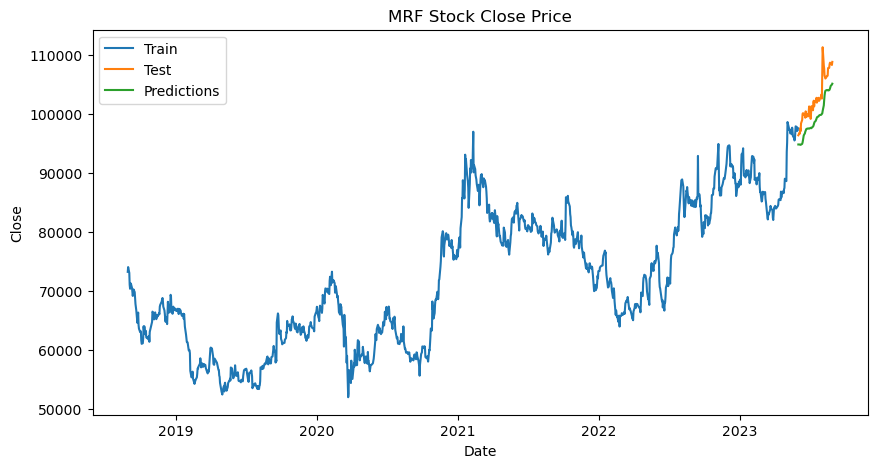

In [23]:
train = df[:training]
test = df[training:]
test['Predictions'] = predictions
 
plt.figure(figsize=(10, 5))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('MRF Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

In above graph green line shows the stock price prediction of MRF Tyre with is upward trend.

## Conclusion:
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.